In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
country = pd.read_csv("Metadata_Country.csv")
pop = pd.read_csv("country_population.csv")
fer = pd.read_csv("fertility_rate.csv")
life_exp = pd.read_csv("life_expectancy.csv")

In [4]:
country.columns = country.columns.str.lower().str.replace(' ','_')

In [5]:
country.head(2)

,country_code,region,incomegroup,specialnotes,tablename,unnamed:_5
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,NaN
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN


In [6]:
country.shape

(263, 6)

In [7]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  263 non-null    object 
 1   region        217 non-null    object 
 2   incomegroup   217 non-null    object 
 3   specialnotes  147 non-null    object 
 4   tablename     263 non-null    object 
 5   unnamed:_5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.5+ KB


In [8]:
country.drop(['incomegroup','specialnotes','tablename','unnamed:_5'],axis = 1,inplace = True)

In [9]:
print(country)

    country_code                      region
0            ABW   Latin America & Caribbean
1            AFG                  South Asia
2            AGO          Sub-Saharan Africa
3            ALB       Europe & Central Asia
4            AND       Europe & Central Asia
..           ...                         ...
258          XKX       Europe & Central Asia
259          YEM  Middle East & North Africa
260          ZAF          Sub-Saharan Africa
261          ZMB          Sub-Saharan Africa
262          ZWE          Sub-Saharan Africa

[263 rows x 2 columns]


In [10]:
country.isnull().sum()

country_code     0
region          46
dtype: int64

In [11]:
country.dropna(axis = 0,inplace = True)

In [12]:
country.shape

(217, 2)

In [13]:
country

,country_code,region
0,ABW,Latin America & Caribbean
1,AFG,South Asia
2,AGO,Sub-Saharan Africa
3,ALB,Europe & Central Asia
4,AND,Europe & Central Asia
...,...,...
258,XKX,Europe & Central Asia
259,YEM,Middle East & North Africa
260,ZAF,Sub-Saharan Africa
261,ZMB,Sub-Saharan Africa


In [14]:
pop.columns = pop.columns.str.lower().str.replace(' ','_')

In [15]:
pop.head(2)

,country_name,country_code,indicator_name,indicator_code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0


In [16]:
years = [str(i) for i in range(1960,2017)]

In [17]:
pop.shape

(264, 61)

In [18]:
pop.isnull().sum()

country_name      0
country_code      0
indicator_name    0
indicator_code    0
1960              4
                 ..
2012              2
2013              2
2014              2
2015              2
2016              2
Length: 61, dtype: int64

In [19]:
pop.dropna(axis=0, inplace=True)

In [20]:
pop.drop(['indicator_name','indicator_code'], axis = 1, inplace = True)

In [21]:
pop = pd.melt(pop,
             id_vars ='country_code',
             value_vars = years,
             var_name ='year',
             value_name = 'population'
             )

pop.head()

,country_code,year,population
0,ABW,1960,54211.0
1,AFG,1960,8996351.0
2,AGO,1960,5643182.0
3,ALB,1960,1608800.0
4,AND,1960,13411.0


In [22]:
fer.columns = fer.columns.str.lower().str.replace(' ','_')

In [23]:
fer.head(2)

,country_name,country_code,indicator_name,indicator_code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.82,4.655,4.471,4.271,4.059,3.842,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.45,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635


In [24]:
fer.shape

(264, 61)

In [25]:
fer.dropna(axis=0, inplace=True)

In [26]:
fer.drop(['indicator_name','indicator_code'], axis = 1, inplace = True)

In [27]:
fer = pd.melt(fer,
             id_vars ='country_code',
             value_vars = years,
             var_name ='year',
             value_name = 'fertility_rate'
             )

fer.head()

,country_code,year,fertility_rate
0,ABW,1960,4.820000
1,AFG,1960,7.450000
2,AGO,1960,7.478000
3,ALB,1960,6.489000
4,ARB,1960,6.948747


In [28]:
life_exp.columns = life_exp.columns.str.lower().str.replace(' ','_')

In [29]:
life_exp.head(2)

,country_name,country_code,indicator_name,indicator_code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673


In [30]:
life_exp.shape

(264, 61)

In [31]:
life_exp.dropna(axis = 0, inplace = True)

In [32]:
life_exp.drop(['indicator_name','indicator_code'], axis = 1, inplace = True)

In [33]:
life_exp = pd.melt(life_exp,
             id_vars ='country_code',
             value_vars = years,
             var_name ='year',
             value_name = 'life_expectancy'
             )

life_exp.head()

,country_code,year,life_expectancy
0,ABW,1960,65.662000
1,AFG,1960,32.292000
2,AGO,1960,33.251000
3,ALB,1960,62.279000
4,ARB,1960,46.825065


In [34]:
country.head(2)

,country_code,region
0,ABW,Latin America & Caribbean
1,AFG,South Asia


In [35]:
pop.head(2)

,country_code,year,population
0,ABW,1960,54211.0
1,AFG,1960,8996351.0


In [36]:
fer.head(2)

,country_code,year,fertility_rate
0,ABW,1960,4.82
1,AFG,1960,7.45


In [37]:
life_exp.head(2)

,country_code,year,life_expectancy
0,ABW,1960,65.662
1,AFG,1960,32.292


In [38]:
df = pd.merge(country,pop,how='left',on=['country_code'])
df.head()

,country_code,region,year,population
0,ABW,Latin America & Caribbean,1960,54211.0
1,ABW,Latin America & Caribbean,1961,55438.0
2,ABW,Latin America & Caribbean,1962,56225.0
3,ABW,Latin America & Caribbean,1963,56695.0
4,ABW,Latin America & Caribbean,1964,57032.0


In [39]:
df = pd.merge(df,fer,how='left',on=['country_code', 'year'])
df.head()

,country_code,region,year,population,fertility_rate
0,ABW,Latin America & Caribbean,1960,54211.0,4.820
1,ABW,Latin America & Caribbean,1961,55438.0,4.655
2,ABW,Latin America & Caribbean,1962,56225.0,4.471
3,ABW,Latin America & Caribbean,1963,56695.0,4.271
4,ABW,Latin America & Caribbean,1964,57032.0,4.059


In [40]:
df = pd.merge(df,life_exp,how='left',on=['country_code', 'year'])
df.head()

,country_code,region,year,population,fertility_rate,life_expectancy
0,ABW,Latin America & Caribbean,1960,54211.0,4.820,65.662
1,ABW,Latin America & Caribbean,1961,55438.0,4.655,66.074
2,ABW,Latin America & Caribbean,1962,56225.0,4.471,66.444
3,ABW,Latin America & Caribbean,1963,56695.0,4.271,66.787
4,ABW,Latin America & Caribbean,1964,57032.0,4.059,67.113


In [41]:
df.dropna(axis = 0,inplace = True)

In [42]:
df.isnull().sum()

country_code       0
region             0
year               0
population         0
fertility_rate     0
life_expectancy    0
dtype: int64

In [43]:
df['year'] = df['year'].astype(int)
df['population'] = df['population'].astype(int)

In [44]:
df.shape

(10602, 6)

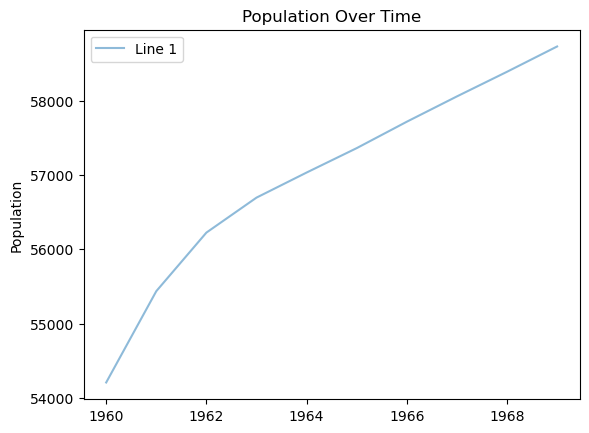

In [46]:
max_pop = df['population'].max()
year = df['year'][:10]
pop = df['population'][:10]
plt.plot(year, pop, alpha=0.5, label='Line 1')
plt.ylabel('Population')
plt.xlabel('year')
plt.title('Population Over Time')
plt.legend()
plt.show()

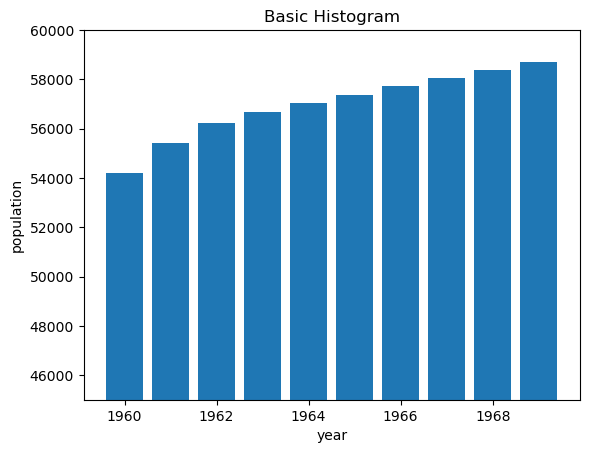

In [49]:
plt.bar(year, pop)
plt.xlabel('year')
plt.ylabel('population')
plt.ylim(45000,60000)
plt.title('Basic Histogram')
plt.show()